In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Data: tips dataset

In [2]:
tips= sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
x= tips.drop(columns='tip')
y= tips['tip']

In [5]:
# encode getdummies
x=pd.get_dummies(x,columns=['sex','smoker','day','time'], drop_first=True)

In [6]:
# Splitting data
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=2020)

# Benchmark Model

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [12]:
tree= DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=2020) #versi lama: criterion='mse'
linreg= LinearRegression()
knn= KNeighborsRegressor()

In [13]:
from sklearn.metrics import SCORERS

In [14]:
SCORERS
# semua score pada sklearn yang siap digunakan
# untuk metrik2 regresi disediakan dalam bentuk negatif
# karena metrik2 tersebut semakin bagus ketika nilainya semakin kecil, 
# sementara metrik2 lain biasanya semakin baik kalau nilainya semakin tinggi

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'top_k_accuracy': make_scorer(top_k_accuracy_score, ne

In [17]:
models=[tree,linreg,knn]
mean_score=[]
std_score=[]

for i in models:
    model_cv=cross_val_score(i, x_train,y_train, scoring='neg_mean_squared_error')
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())

In [18]:
pd.DataFrame({
    'model':['tree','linreg','knn'],
    'mean':mean_score,
    'std':std_score
})

,model,mean,std
0,tree,-1.292556,0.267949
1,linreg,-1.132021,0.339332
2,knn,-1.241377,0.257382


Score paling tinggi (error paling rendah) dari hasil cross validassi di atas adalah model linreg, sementara yang paling stabil adalah knn. Seharusnya kita memilih di antara kedua model tersebut, tapi di contoh kasus ini, kita akan mencoba dengan Decision Tree Regressor.

## Model Performance in Data test

In [22]:
tree= DecisionTreeRegressor(criterion='squared_error', max_depth=5)
tree.fit(x_train,y_train)
y_pred= tree.predict(x_test)
print('mse:', mean_squared_error(y_test,y_pred))

mse: 1.503256062977797


C:\Users\brigi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


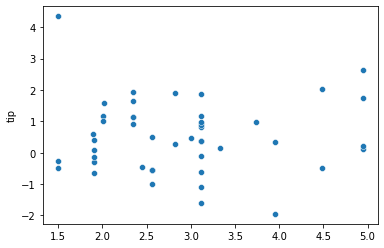

In [23]:
residual= y_test-y_pred
sns.scatterplot(y_pred, residual)

# Hyperparameter Tunning: Randomized Search

In [24]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
hyperparam_space={
    'min_samples_leaf':[1,5,10,15,20,50], #benchmark 1
    'max_depth':[2,3,4,5,6,7], #benchmark 5
    'criterion':['squared_error','absolute_error'] #benchmark squared error #versi lama mse dan mae 
} #total 72 kombinasi

In [30]:
tree= DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=2020)

random_search=RandomizedSearchCV(
    tree,
    param_distributions=hyperparam_space,
    n_iter=20, #berapa kombinasi yang akan dicoba secara acak, dari 72 kombinasi, kita akn mencoba 20 kombinasi secara acak
    cv=5, #tanpa skfold, karena tidak perlu distratify
    scoring='neg_mean_squared_error',
    random_state=2020,
    n_jobs=-1
)

In [32]:
random_search.get_params() #semua paramater yang bisa diatur pada random search

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': 5,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 2020,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeRegressor(max_depth=5, random_state=2020),
 'n_iter': 20,
 'n_jobs': -1,
 'param_distributions': {'min_samples_leaf': [1, 5, 10, 15, 20, 50],
  'max_depth': [2, 3, 4, 5, 6, 7],
  'criterion': ['squared_error', 'absolute_error']},
 'pre_dispatch': '2*n_jobs',
 'random_state': 2020,
 'refit': True,
 'return_train_score': False,
 'scoring': 'neg_mean_squared_error',
 'verbose': 0}

In [31]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=5,
                                                   random_state=2020),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 5, 10, 15, 20,
                                                             50]},
                   random_state=2020, scoring='neg_mean_squared_error')

In [33]:
print('best param', random_search.best_params_)
print('best score', random_search.best_score_)

best param {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'squared_error'}
best score -0.9829038972124049


In [34]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010867,0.007064,0.003569,0.000726,1,2,absolute_error,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.738330,-0.851707,-1.323954,-1.509013,-1.356648,-1.155931,0.303358,3
1,0.007638,0.000247,0.003817,0.000280,5,7,squared_error,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.266981,-0.767827,-1.325200,-2.239966,-1.472244,-1.414444,0.475952,19
2,0.007300,0.000835,0.003630,0.001093,5,4,squared_error,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-1.144108,-0.817462,-1.375826,-2.197390,-1.445703,-1.396098,0.456784,18
3,0.006121,0.001239,0.002798,0.000403,20,2,absolute_error,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",-0.722048,-1.093600,-1.182453,-1.955167,-1.356648,-1.261983,0.403899,6
4,0.008201,0.002870,0.003046,0.000262,5,2,absolute_error,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",-0.722048,-1.093600,-1.215538,-1.960931,-1.356648,-1.269753,0.404778,8
5,0.009111,0.005909,0.003380,0.000383,50,7,squared_error,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.879731,-0.900169,-1.479036,-2.103678,-1.437448,-1.360013,0.450628,12
6,0.005048,0.000430,0.004154,0.002328,1,4,squared_error,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",-0.771622,-0.665101,-1.593723,-1.029129,-0.854944,-0.982904,0.327795,1
7,0.005282,0.000576,0.003178,0.000197,5,3,squared_error,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.987999,-0.897975,-1.295115,-2.212884,-1.413923,-1.361579,0.466126,14
8,0.006508,0.000536,0.004138,0.000925,20,4,absolute_error,"{'min_samples_leaf': 20, 'max_depth': 4, 'crit...",-0.805774,-1.082392,-1.204603,-1.997315,-1.332621,-1.284541,0.396694,9
9,0.005704,0.001293,0.003132,0.000728,1,2,squared_error,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.816130,-0.882642,-1.424336,-1.108872,-0.924132,-1.031222,0.219261,2


## Before vs After Tunning

In [39]:
#before
tree=DecisionTreeRegressor(criterion='squared_error',max_depth=5, random_state=2020)
tree.fit(x_train,y_train)
y_pred= tree.predict(x_test)
print('mse:', mean_squared_error(y_test,y_pred))

mse: 1.4671679252226948


In [36]:
#after
tree=random_search.best_estimator_
y_pred= tree.predict(x_test)
print('mse:', mean_squared_error(y_test,y_pred))

mse: 1.3093536770005814


Hasil tunning tidak meningkatkan performa model secara signifikan, karena model awal memiliki performa yang kurang stabil